In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [1]:
def ler_excel(arq):
    lista = pd.read_csv(arq, sep=';')

    lista_num = lista.to_numpy()


    lis =[]


    for x in lista_num:
        ir_lis =[]
        lis_b = np.zeros(28)
        lis_c = np.zeros(28)
        ir_lis.append(x[0])
        ir_lis.append(np.sum(x[1:])/255)

        for y in range(28):
            c = x[y*28 + 1:y*28 + 29]
            c = c[0:14] - c[:13:-1]
            c = np.sqrt(c*c)
            lis_b[y] = np.sum(c)


            # horizontal 

            d=[]
            for t in range(28):
                d.append(x[28*t+y+1])
            d = np.array(d)
            d = d[0:14] - d[:13:-1]
            d = np.sqrt(d*d)
            lis_c[y] = np.sum(d)
            
        ir_lis.append((np.sum(lis_b)/255)+(np.sum(lis_c)/255))

        lis.append(ir_lis)

    lis = np.array(lis)
    maximo = np.max(lis[:,1])
    maximo2 = np.max(lis[:,2])
    
    print(maximo, maximo2)

    lis[:,1] /= 255

    lis[:,2] /= 255

    return (lis)


In [3]:
def ver_numero(arq,num):

    lista = pd.read_csv(arq, sep=';')

    lista_num = lista.to_numpy()

    g = np.ones((28,28))

    xx = lista_num[num]

    x = 0
    y = 0 
    
    com = True
    for yy in xx:
        if com:
            com = False
        else:
            g[x , y] = yy
            y+=1
            if y== 28:
                y = 0
                x += 1

    plt.imshow(g)

        


In [3]:
dados = ler_excel("test.csv")


158.30196078431374 161.03529411764706


In [4]:
28*28

784

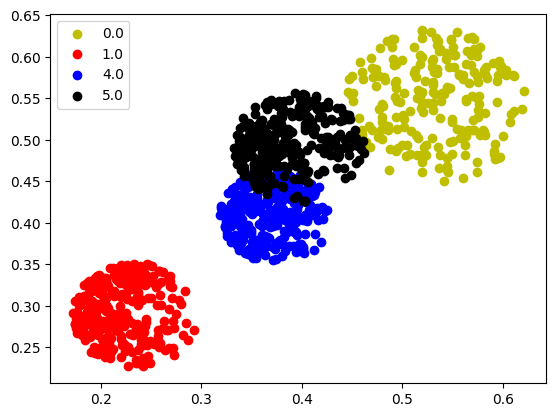

In [25]:
"""plt.scatter(dados[:,1],dados[:,2],c=dados[:,0])
plt.legend(loc="upper left")
plt.show"""

cores = ["y","r","g","w","b","k"]
valores =[0,1,4,5]
for v in valores:
    item = dados[dados[:,0]==v]
    label = item[0,0]
    plt.scatter(item[:,1],item[:,2] , c=cores[int(label)] , label=str(label))

plt.legend()
